# MODEL TRAINING

In [25]:
import os
import cv2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import import_ipynb
import DatasetPreparation
import Modeling
from tensorflow.keras.layers import Input, Normalization, Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.metrics import BinaryAccuracy, FalsePositives, FalseNegatives, TrueNegatives, TruePositives, Precision, Recall, F1Score, AUC
from tensorflow.keras.regularizers import L2
import sklearn

In [2]:
trainDataset, testDataset, valDataset = DatasetPreparation.trainDataset, DatasetPreparation.testDataset, DatasetPreparation.valDataset
model = Modeling.model

## Loss Function

In [3]:
lossFunction = tf.keras.losses.CategoricalCrossentropy() # If Labels as One-Hot-Encodings
sparseLossFunction = tf.keras.losses.SparseCategoricalCrossentropy() # If Labels as Integers

In [4]:
# Testing The Loss Function

# y_true = [[0, 1, 0], [0, 0, 1]]
# y_pred = [[0.05, 0.95, 0], [0.1, 0.8, 0.1]]
# loss = lossFunction(y_true, y_pred)
# loss.numpy()

# y_true = tf.constant([1, 2])
# y_pred = tf.constant([[0.05, 0.95, 0], [0.1, 0.8, 0.1]])
# loss = sparseLossFunction(y_true, y_pred)
# loss

# Metrics

### Top-K-Accuracy -> If any of the K highest predictions matches the true label.

In [5]:
METRICS = [tf.keras.metrics.CategoricalAccuracy(name="accuracy"), tf.keras.metrics.TopKCategoricalAccuracy(k=2, name="top_k_accuracy")]

In [6]:
CONFIGURATION = Modeling.CONFIGURATION
CONFIGURATION

{'CLASS_NAMES': ['angry', 'happy', 'sad'],
 'BATCH_SIZE': 32,
 'IMAGE_SIZE': 256,
 'LEARNING_RATE': 0.001,
 'N_EPOCHS': 20,
 'DROPOUT_RATE': 0.0,
 'REGULARIZATION_RATE': 0.0,
 'N_FILTERS': 6,
 'KERNEL_SIZE': 3,
 'N_STRIDES': 1,
 'POOL_SIZE': 2,
 'N_DENSE_1': 100,
 'N_DENSE_2': 10,
 'NUM_CLASSES': 3}

In [7]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=CONFIGURATION["LEARNING_RATE"]),
    loss = lossFunction,
    metrics=METRICS
)

## Training

In [8]:
history = model.fit(
    trainDataset,
    validation_data = valDataset,
    epochs = CONFIGURATION['N_EPOCHS'],
    verbose=1
)

Epoch 1/20


2025-01-28 11:07:21.379332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


170/170 ━━━━━━━━━━━━━━━━━━━━ 22s 122ms/step - accuracy: 0.4225 - loss: 1.1032 - top_k_accuracy: 0.7573 - val_accuracy: 0.4459 - val_loss: 1.0551 - val_top_k_accuracy: 0.7800
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 0.5783 - loss: 0.9220 - top_k_accuracy: 0.8514 - val_accuracy: 0.5129 - val_loss: 0.9817 - val_top_k_accuracy: 0.8043
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - accuracy: 0.6874 - loss: 0.7546 - top_k_accuracy: 0.8986 - val_accuracy: 0.5607 - val_loss: 0.9772 - val_top_k_accuracy: 0.7991
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - accuracy: 0.7787 - loss: 0.5920 - top_k_accuracy: 0.9362 - val_accuracy: 0.5269 - val_loss: 1.0684 - val_top_k_accuracy: 0.8793
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 20s 119ms/step - accuracy: 0.8498 - loss: 0.4460 - top_k_accuracy: 0.9651 - val_accuracy: 0.6681 - val_loss: 0.8393 - val_top_k_accuracy: 0.8808
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 0.8975 - loss: 0.33

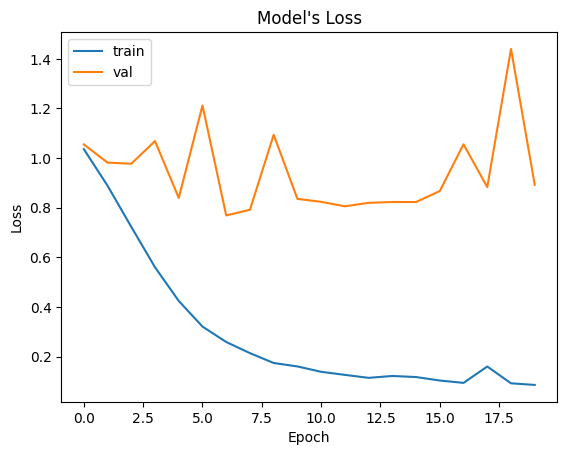

In [9]:
# PLotting the model's loss graph for both training and validation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["train", "val"])
plt.show()

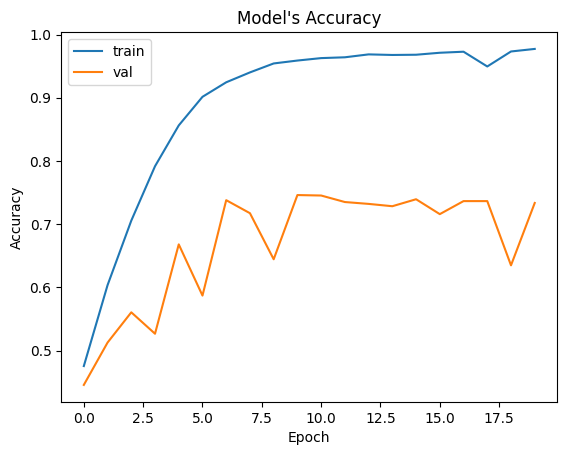

In [10]:
# PLotting the model's accuracy graph for both training and validation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model's Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["train", "val"])
plt.show()

In [11]:
model.evaluate(testDataset)

72/72 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7159 - loss: 1.1054 - top_k_accuracy: 0.8781


[1.0096676349639893, 0.7234416007995605, 0.8950834274291992]

## Testing

In [12]:
testImage = cv2.imread("/Users/aman/Documents/Work/Machine Learning/Computer-Vision-TensorFlow/Human-Emotions-Detection/Dataset/Emotions Dataset/Emotions Dataset/test/happy/2705.jpg_rotation_1.jpg")

image = tf.constant(testImage, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)

prediction = model.predict(image)

print(CONFIGURATION["CLASS_NAMES"][tf.argmax(prediction, axis=-1).numpy()[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
happy


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


2025-01-28 11:15:14.451542: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


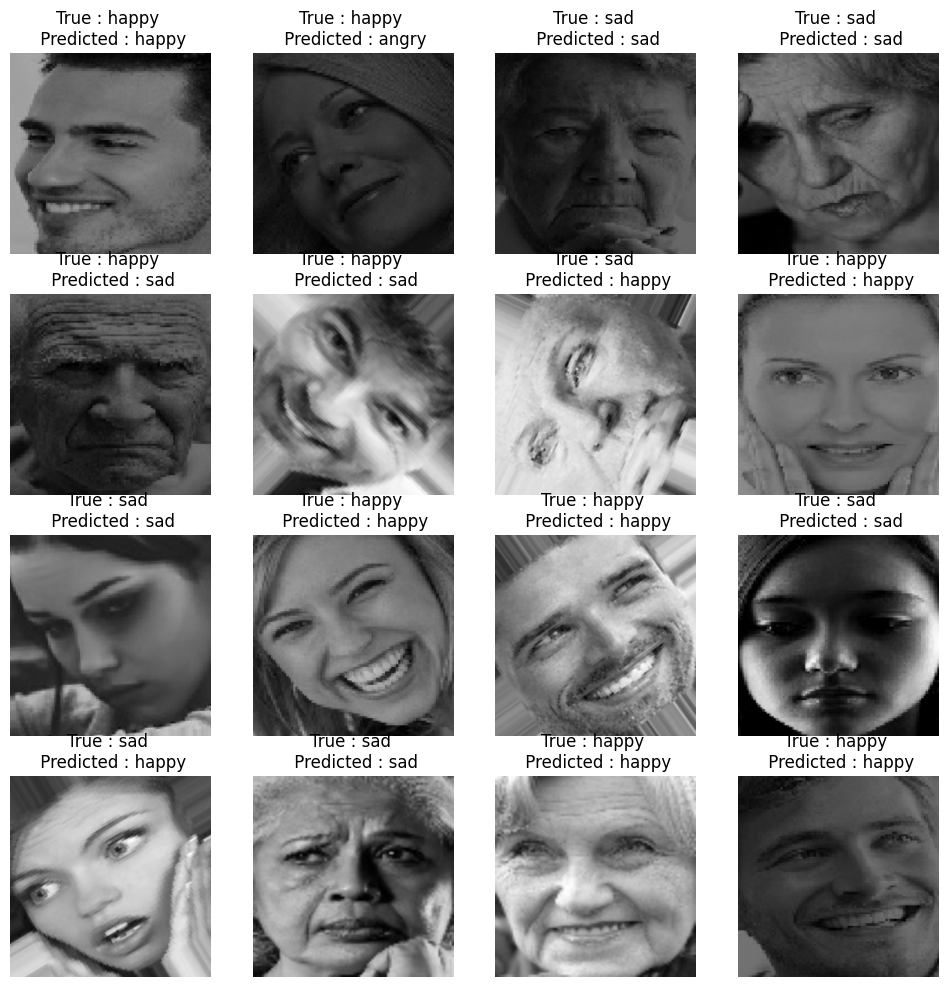

In [15]:
# Testing 1 Batch
plt.figure(figsize=(12, 12))

for images, labels in testDataset.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(images[i]/255.0)
        prediction = model.predict(tf.expand_dims(images[i], axis=0))
        true = CONFIGURATION["CLASS_NAMES"][tf.argmax(labels[i], axis=0).numpy()]
        predicted = CONFIGURATION["CLASS_NAMES"][tf.argmax(prediction, axis=-1).numpy()[0]]
        plt.title("True : {} \n Predicted : {}".format(true, predicted))
        plt.axis("off")

## Confusion Matrix

In [40]:
labels = []
predicted = []
for image, label in valDataset:
    predicted.append(model.predict(image, verbose=0))
    labels.append(label.numpy())

2025-01-28 11:28:09.006088: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [43]:
pred = np.argmax(predicted[:-1], axis=-1).flatten()
true = np.argmax(labels[:-1], axis=-1).flatten()
print(pred, true)

[2 1 2 ... 2 0 0] [2 1 2 ... 2 0 0]


[[169  61  69]
 [ 34 492  73]
 [ 50  72 324]]


Text(0.5, 36.72222222222221, 'Predicted')

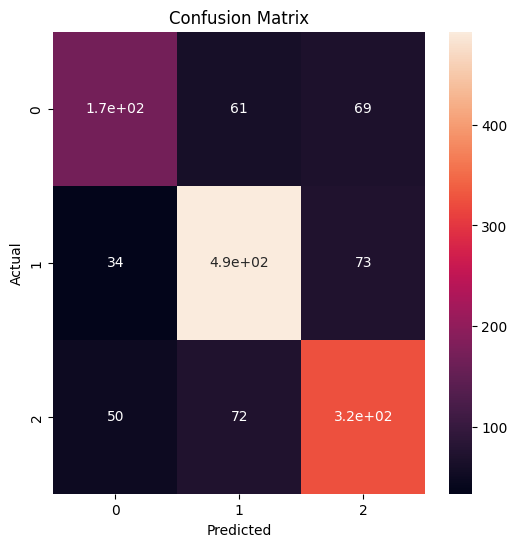

In [44]:
cm = sklearn.metrics.confusion_matrix(true, pred)
print(cm)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')